In [1]:
import numpy as np
import pandas as pd

In [2]:
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                         sheet_name='Canada by Citizenship',
                         skiprows = range(20),
                         skipfooter = 2)

In [3]:
df_canada.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [4]:
df_canada.drop(['AREA','REG','DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

In [5]:
df_canada.columns.values

array(['OdName', 'AreaName', 'RegName', 'DevName', 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [6]:
df_canada.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_canada.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [7]:
df_canada.columns = list(map(str, df_canada.columns))

In [8]:
df_canada.set_index('Country', inplace = True)

In [9]:
df_canada['Totals'] = df_canada.sum(axis=1)
df_canada.columns.values

array(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', 'Totals'],
      dtype=object)

In [10]:
years = list(map(str, range(1980, 2014)))

In [11]:
print('Data dimension: ', df_canada.shape)

Data dimension:  (195, 38)


In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [13]:
#group countries by combines and apply sum() 
df_continents = df_canada.groupby('Continent', axis = 0).sum()

#note the output of the groupby method is a groupby object
#we can not use it furhter until we apply a functions(eg, sum)

print(type(df_canada.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Totals
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


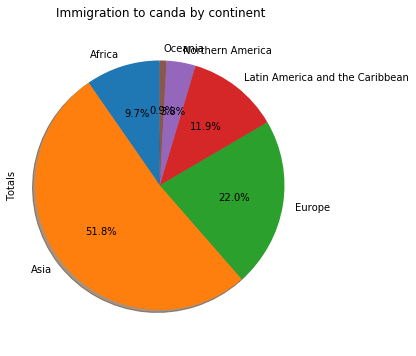

In [14]:
df_continents['Totals'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.1f%%', #add in percentage
                            startangle=90, #start  angle 90 degree(africa)
                             shadow=True, #add shadow for 3d value
                            )
plt.title('Immigration to canda by continent')
plt.axis('equal') #sets the pie chart to look like a circle
plt.show()

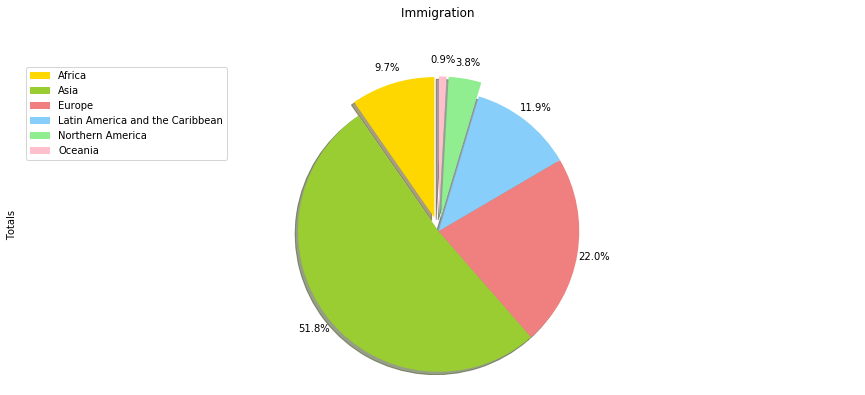

In [17]:
colors_list = ['gold','yellowgreen','lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] #ratio for each continent with which to offset each wedge

df_continents['Totals'].plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels = None,
                            pctdistance=1.12, #ratio between the center of each pie slice and the start of the text generated by autopct
                            colors = colors_list,
                            explode=explode_list #explode lowest 3 continents
                            )
#scale the title up by 12% to match pctdistance
plt.title('Immigration ', y=1.12)
plt.axis('equal')
#add legend :: Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend()
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

In [18]:
explode_list = [0.1,0,0,0,.1,.1]
df_contients['2013'].plot(kind='pie',
                        figsize=(15,6),
                        shadow=True,
                        labels=None,
                        autopct='%1.1f%%',
                        startangle=90,
                        pctdistance=1.12,
                        explode=explode_list)
plt.title('2013 years immigration')
plt.axis('equal')
plt.show()

NameError: name 'df_contents' is not defined